## Import TensorFlow package

In [1]:
# inport tensorflow
import tensorflow as tf
print(tf.__version__)
import numpy as np # numpy package for array process
import matplotlib.pyplot as plt # package for ploting figures
%matplotlib inline
# incase you don't have tensorflow, install using pip, 
# the same for numpy, matplot, and other package
# !pip install tensorflow 

2.4.0


In [2]:
datasize = 10 # define the data size
times = np.array([i for i in range(datasize)], dtype=float)
v0 = 10
g = 9.8
vt = np.array([g * t + v0 for t in times])

tx = 100
vt_true = g*tx+v0

## 1. Explore data

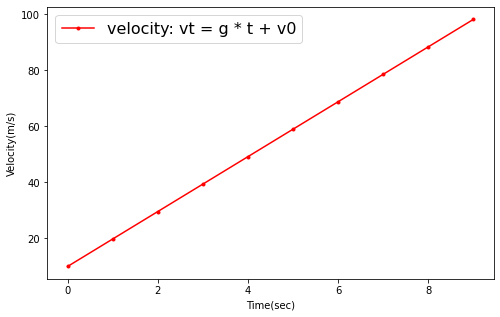

In [4]:
plt.figure(figsize=(8,5))
plt.plot(times, vt, 'r.-', label='velocity: vt = g * t + v0')
plt.xlabel('Time(sec)')
plt.ylabel('Velocity(m/s)')
plt.legend(loc='upper left',fontsize=16);

## 2. Construct and train the model

In [3]:
l0 = tf.keras.layers.Dense(units=1,input_shape=[1]) # layer zero

model = tf.keras.Sequential([l0]) # model with one dense layer
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
training_steps = 100
history = model.fit(times, vt, epochs=training_steps, verbose=False)

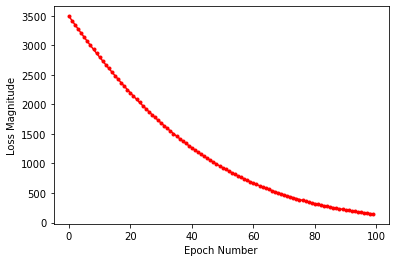

In [7]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'],'r.-');

## 3. Prediction, use the model

In [8]:
tx = 100
vt_true = g*tx+v0
vt_pred = model.predict([tx])[0][0]
print('Label: {:.1f}, Predict: {:.1f}'.format(vt_true, vt_pred))

Label: 990.0, Predict: 805.0


## Explore the model, Looking at the layer weights

In [16]:
l0_weights = l0.get_weights()
print("These are the layer variables: {}".format(l0_weights))

These are the layer variables: [array([[8.719485]], dtype=float32), array([7.3387227], dtype=float32)]


loss:0.019340509548783302
Label: 990.0, Predict: 989.9
Layer variables: [array([[9.795908]], dtype=float32), array([10.275824], dtype=float32)]


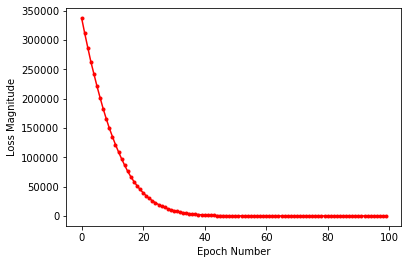

In [9]:
## Increase the data size

datasize = 100 # define the data size
times = np.array([i for i in range(datasize)], dtype=float)
v0 = 10
g = 9.8
vt = np.array([g * t + v0 for t in times])

l0 = tf.keras.layers.Dense(units=1,input_shape=[1]) # layer zero
model = tf.keras.Sequential([l0]) # model with one dense layer
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

training_steps = 100
history = model.fit(times, vt, epochs=training_steps, verbose=False)

plt.figure()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'], 'r.-');

print('loss:{}'.format(history.history['loss'][-1]))

vt_pred = model.predict([tx])[0][0]
print('Label: {:.1f}, Predict: {:.1f}'.format(vt_true, vt_pred))

l0_weights = l0.get_weights()
print("Layer variables: {}".format(l0_weights))

loss:0.0018192300340160728
Label: 990.0, Predict: 990.0


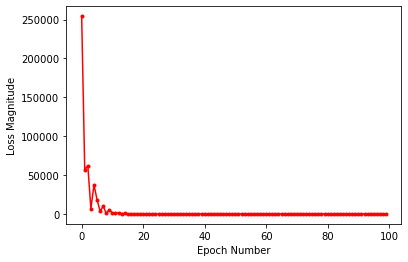

In [12]:
## Increase the model size

datasize = 100 # define the data size
times = np.array([i for i in range(datasize)], dtype=float)
v0 = 10
g = 9.8
vt = np.array([g * t + v0 for t in times])

l0 = tf.keras.layers.Dense(units=3, input_shape=[1]) # input layer
l1 = tf.keras.layers.Dense(units=4) # hidden layer
l2 = tf.keras.layers.Dense(units=1) # output layer

model = tf.keras.Sequential([l0, l1, l2]) # model with three layer
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

training_steps = 100
history = model.fit(times, vt, epochs=training_steps, verbose=False)

plt.figure()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'], 'r.-');

print('loss:{}'.format(history.history['loss'][-1]))

vt_pred = model.predict([tx])[0][0]
print('Label: {:.1f}, Predict: {:.1f}'.format(vt_true, vt_pred))



In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [16]:
# print("Layer 0 variables: {}".format(l0.get_weights()))
# print("Layer 1 variables: {}".format(l1.get_weights()))
# print("Layer 2 variables: {}".format(l2.get_weights()))

In [20]:
print('Layer 0 weight: {}'.format(l0.get_weights()[0]))
print('Layer 0 bias: {}'.format(l0.get_weights()[1]))

Layer 0 weight: [[ 1.6112216   0.53750473 -1.0065322 ]]
Layer 0 bias: [ 0.7452798  -0.10204069 -0.70976436]


In [23]:
print('Layer 1 weight: {}'.format(l1.get_weights()[0]))
print('Layer 1 weight shape: {}'.format(l1.get_weights()[0].shape), end='\n\n')

print('Layer 1 bias: {}'.format(l1.get_weights()[1]))
print('Layer 1 bias shape: {}'.format(l1.get_weights()[1].shape), end='\n\n')

Layer 1 weight: [[ 0.16905764  0.8514002  -0.72342193 -1.386371  ]
 [-0.51441795  0.10079163 -1.2740701  -0.42593476]
 [-0.3646136  -0.71445614  0.94716996  0.9948783 ]]
Layer 1 weight shape: (3, 4)

Layer 1 bias: [-0.10434005  1.0773745  -1.2164172  -1.2705129 ]
Layer 1 bias shape: (4,)



In [24]:
print('Layer 2 weight: {}'.format(l2.get_weights()[0]))
print('Layer 2 weight shape: {}'.format(l2.get_weights()[0].shape), end='\n\n')

print('Layer 2 bias: {}'.format(l2.get_weights()[1]))
print('Layer 2 bias shape: {}'.format(l2.get_weights()[1].shape), end='\n\n')

Layer 2 weight: [[-0.19073962]
 [ 0.62564766]
 [-1.1730487 ]
 [-1.5125006 ]]
Layer 2 weight shape: (4, 1)

Layer 2 bias: [1.4180387]
Layer 2 bias shape: (1,)



## Save the model

In [20]:
import time
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1636428887.h5


## Load the model

In [22]:

import tensorflow_hub as hub
reloaded = tf.keras.models.load_model(
  export_path_keras, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
 dense_5 (Dense)             (None, 4)                 16        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [23]:
vt_pred = reloaded.predict([tx])[0][0]
print('Label: {:.1f}, Predict: {:.1f}'.format(vt_true, vt_pred))

Label: 990.0, Predict: 990.1


In [ ]:
l0 = tf.keras.layers.Dense(units=3, input_shape=[1]) # input layer
l1 = tf.keras.layers.Dense(units=4) # hidden layer
l2 = tf.keras.layers.Dense(units=1) # output layer

model = tf.keras.Sequential([l0, l1, l2]) # model with three layer

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=3, input_shape=[1]),
                             tf.keras.layers.Dense(units=4),
                             tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
